# Common Imports

In [1]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
%matplotlib inline

In [2]:
# Make sure we are using version 0.22.1 of scikit learn
import sklearn
print(sklearn.__version__)

if sklearn.__version__ != "0.22.1":
    print("Wrong version!! Update using 'pip install -U scikit-learn'")
    

0.22.1


In [3]:
## Null Accuracy
What is the probability that you would get if you just report back the most prevalent class?
def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    norm = counts / np.sum(counts)
    return max(norm)

Object `class` not found.


# Datasets

In [4]:
from sklearn import datasets

## Breast Cancer 

Null Accuracy: 62.74 %


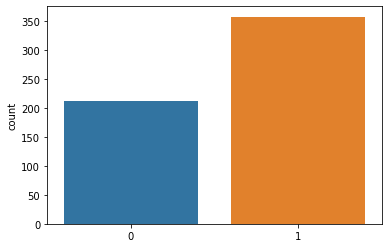

In [5]:
cancer = datasets.load_breast_cancer()

cancerX = cancer.data
cancery = cancer.target
cancer_labels = ['not cancer', 'cancer']

cancer_null = calculate_null_accuracy(cancery)
print("Null Accuracy: %.2f %%" % (cancer_null*100))

sns.countplot(cancery)

## Wine Quality

Null Accuracy: 53.47 %


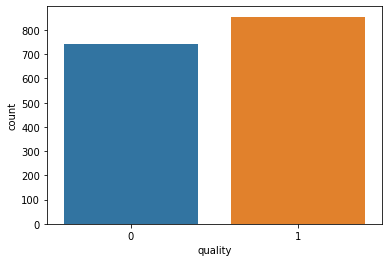

In [6]:
wine = pd.read_csv('datasets/wine-quality/winequality-red.csv', sep=';')
# Preprocess the data
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

# separate the dataset as response variable and feature variables
wineX = wine.drop('quality', axis=1)
winey = wine['quality']
wine_labels = ['bad wine', 'good wine']

# look at distribution
wine_null = calculate_null_accuracy(winey)
print("Null Accuracy: %.2f %%" % (wine_null*100))

sns.countplot(wine['quality'])

## Digits

Null Accuracy: 10.18 %


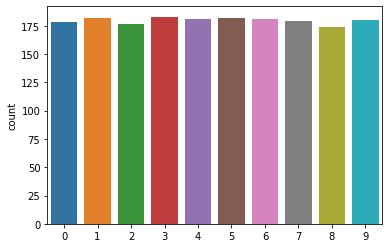

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

digitsX = digits.data
digitsy = digits.target
digits_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# look at distribution
digits_null = calculate_null_accuracy(digitsy)
print("Null Accuracy: %.2f %%" % (digits_null*100))

sns.countplot(digitsy)


## Divorce

Null Accuracy: 50.59 %


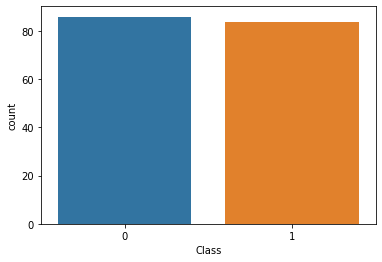

In [8]:
from sklearn.preprocessing import OneHotEncoder

divorce = pd.read_csv('datasets/divorce/divorce.csv', sep=';')

# Preprocess the data
divorceX = divorce.drop('Class', axis=1)
divorcey = divorce['Class']
divorce_labels = ['divorced', 'married']

divorce_null = calculate_null_accuracy(divorcey)
print("Null Accuracy: %.2f %%" % (divorce_null*100))

sns.countplot(divorcey)

## Mushrooms

Null Accuracy: 51.80 %


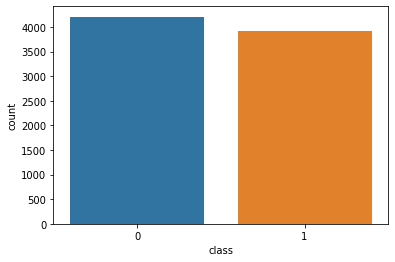

In [9]:
mushrooms = pd.read_csv('datasets/mushrooms/mushrooms.csv')

# encode all of the features
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])
 
mushroomX = mushrooms.drop('class', axis=1)
mushroomy = mushrooms['class']
mushroom_labels=['edible', 'poisonous']

mushroom_null = calculate_null_accuracy(mushroomy)
print("Null Accuracy: %.2f %%" % (mushroom_null*100))

sns.countplot(mushroomy)

## Chosen Dataset

In [10]:
# Choose dataset to use going forward
X = digitsX
y = digitsy
labels = digits_labels

test_size=0.3

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

# Helper Function Definitions

## Model Complexity

In [11]:
def plot_model_complexity(clf, X, y):
    return 0


## Validation Curve
Helps the visualize the performance metrix over a range of values for some hyperparameter for a given algorithm


In [12]:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/
from sklearn.model_selection import validation_curve

def plot_validation_curve(clf, X, y, param_name, param_range, title='Validation Curve'):
    # Calculate accuracy on training and test set using range of parameter values
    train_scores, test_scores = validation_curve(clf, 
                                                 X, 
                                                 y, 
                                                 param_name=param_name, 
                                                 param_range=param_range,
                                                 cv=10, 
                                                 scoring="accuracy", 
                                                 n_jobs=-1)


    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot mean accuracy scores for training and test sets
    plt.plot(param_range, train_mean, label="Training score")
    plt.plot(param_range, test_mean, label="Cross-validation score")

    # Plot accurancy bands for training and test sets
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create plot
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    
    # print out optimal value
    best_idx = np.where(test_mean == test_mean.max())
    best_param = param_range[best_idx]
    

    print('Best parameter values: ')
    print(best_param)
    

## Learning Curve
Helps to visualize the effect of the number of observations on the performance metric

In [13]:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
from sklearn.model_selection import learning_curve

def plot_learning_curve(clf, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                        clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 20),
                                                        return_times = True,
                                                        random_state = 0)

    # ------------------------------------------------------------------------------------------
    # Plot Learning Curve
    # ------------------------------------------------------------------------------------------
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.figure(1)
    plt.plot(train_sizes, train_mean, '--', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create learning curve plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # ------------------------------------------------------------------------------------------
    # Plot Scalability Curve
    # ------------------------------------------------------------------------------------------
    # Create mean and std of training times
    train_times_mean = np.mean(fit_times, axis=1)
    train_times_std  = np.std(fit_times, axis=1)
    
    # plot lines
    plt.figure(2)
    plt.plot(train_sizes, train_times_mean, 'o-')
    plt.fill_between(train_sizes, train_times_mean - train_times_std, train_times_mean + train_times_std, color='#DDDDDD')
    plt.title('Training Scalability')
    plt.xlabel('Training Set Size')
    plt.ylabel('Fit Times (s)')
    plt.grid()
    plt.show()
    
    

## ROC Curve
Shows the true positive and false positive rate for every probability threshold of a binary classifier. The closer to the top left of the chart that the curves comes, the better.

In [14]:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_receiving_operating_characteristic_curve/
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(clf, X_test, y_test, title='ROC Curve'):
    if len(np.unique(y_test)) != 2:
        print("Cannot plot ROC curve for anything other than binary classification")
        return 0
    
    # Get predicted probabilities
    y_score = clf.predict_proba(X_test)[:,1]
    
    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

    # Plot ROC curve
    plt.title(title)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid()
    plt.show()
    

## Null Accuracy
What is the probability that you would get if you just report back the most prevalent class?

In [15]:
from sklearn.preprocessing import normalize

def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)


## Confusion Matrix

In [16]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import plot_confusion_matrix
import numpy as np

def plot_confusion(clf, X_test, y_test, labels):
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        #print(title)
        #print(disp.confusion_matrix)
        plt.show()

    plt.show()
    
    return 0

## Example Usage

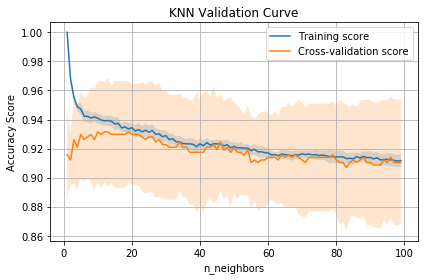

Best parameter values: 
[19]


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Plot validatin curve of k in KNN for the breast cancer data
clf = KNeighborsClassifier()
param_name = "n_neighbors"
param_range = np.arange(1,100,1)
plot_validation_curve(clf, cancerX, cancery, param_name, param_range, 'KNN Validation Curve')

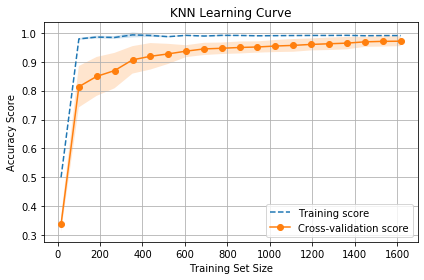

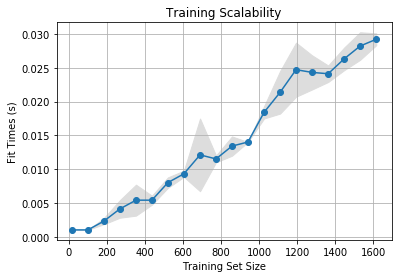

In [18]:
# Plot learning curve for the digits data
clf = KNeighborsClassifier()
plot_learning_curve(clf, digitsX, digitsy, 'KNN Learning Curve')

In [19]:
# Plot ROC curve for wine data
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
plot_roc_curve(clf, X_test, y_test, 'KNN ROC Curve')

Cannot plot ROC curve for anything other than binary classification


0

In [20]:
# Calculate null accuracy of digits
null = calculate_null_accuracy(cancery)
print('Null accuracy: %.2f %%percent' % (null*100))

Null accuracy: 62.74 %percent


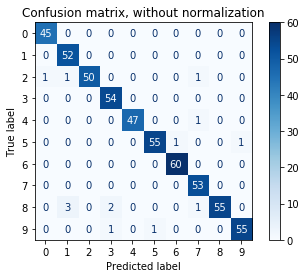

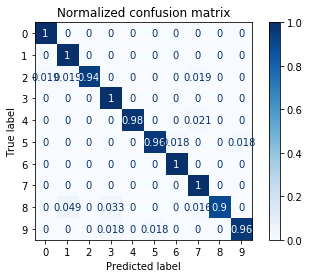

0

In [21]:
# Plot confusion matrix
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(X_train, y_train)

plot_confusion(clf, X_test, y_test, labels)

# Algorithms

## Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier


### Perform Grid Search

In [23]:
# Set parameters to search in grid search
depths = np.arange(1,40,1)
params = {'max_depth': depths}

clf = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                   params,
                   scoring='accuracy',
                   cv=10)

t0 = time.time()
clf.fit(X_train, y_train)
tree_time = time.time() - t0
print("Decision Tree model fitted in %.3f s" % tree_time)

print('Best Scores: %.3f using %r' % (clf.best_score_, clf.best_params_))

# save off the best depth
best_depth = clf.best_params_['max_depth']

Decision Tree model fitted in 4.454 s
Best Scores: 0.842 using {'max_depth': 10}


### Validation Curve

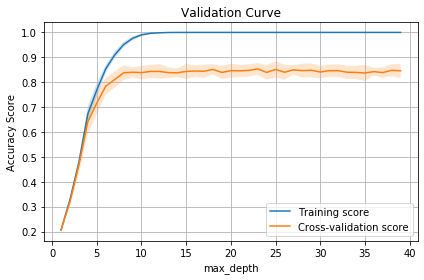

Best parameter values: 
[23]


In [24]:
# create validation curve varying max depth
clf = DecisionTreeClassifier()
param_name = "max_depth"
param_range = np.arange(1,40,1)
plot_validation_curve(clf, X_train, y_train, param_name, param_range)

### Cost Complexity Pruning
[Sci-kit Learn Tutorial](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)


#### Total impurity of leaves vs effective alphas of pruned tree

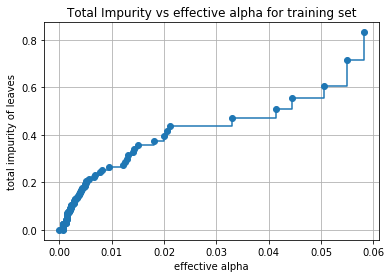

In [25]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.grid()

In [26]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06724537817328036


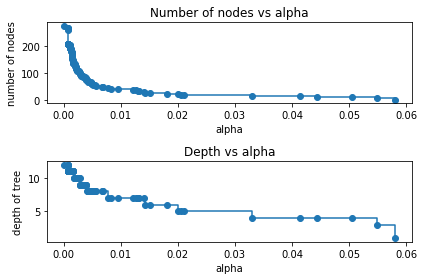

In [27]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and test sets

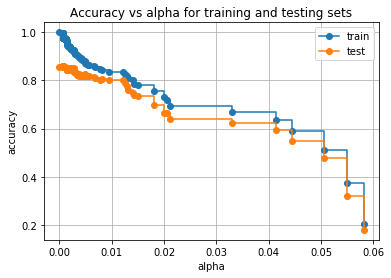

Optimal ccp_alpha: 0.001


In [28]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

best_idx   = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[best_idx]

print('Optimal ccp_alpha: %.3f' % best_alpha)

### Learning & Scalability Curve

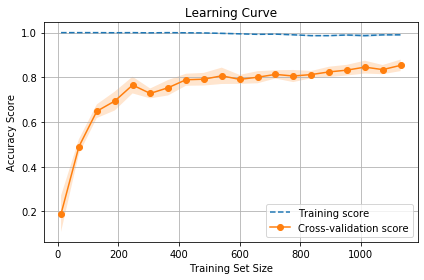

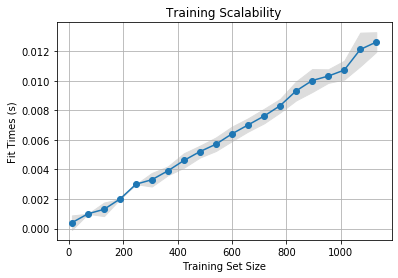

In [29]:
# Plot learning curve for the digits data
clf_depth_based = DecisionTreeClassifier(max_depth=best_depth)
plot_learning_curve(clf_depth_based, X_train, y_train)

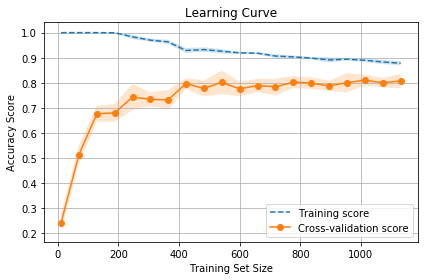

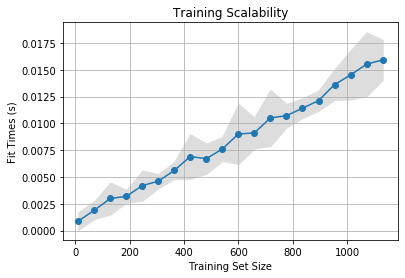

In [54]:
# Plot learning curve based on using best ccp_alpha
clf_alpha_based = DecisionTreeClassifier(ccp_alpha=0.005, random_state=0)
plot_learning_curve(clf_alpha_based, X_train, y_train)

### Model Accuracy

Cannot plot ROC curve for anything other than binary classification
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        45
           1       0.80      0.83      0.81        52
           2       0.86      0.79      0.82        53
           3       0.76      0.89      0.82        54
           4       0.81      0.92      0.86        48
           5       0.93      0.88      0.90        57
           6       0.89      0.92      0.90        60
           7       0.87      0.85      0.86        53
           8       0.87      0.67      0.76        61
           9       0.76      0.82      0.79        57

    accuracy                           0.84       540
   macro avg       0.85      0.85      0.84       540
weighted avg       0.85      0.84      0.84       540



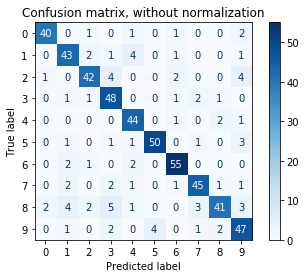

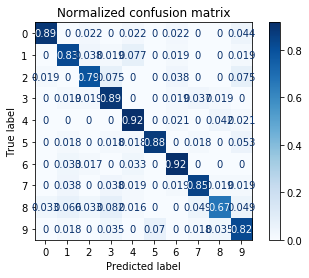

0

In [55]:
# Predict results using the test set
clf_depth_based.fit(X_train, y_train)
tree_pred = clf_depth_based.predict(X_test)

# Plot ROC curve
plot_roc_curve(clf_depth_based, X_test, y_test)

# let's see how our model performed
print(classification_report(y_test, tree_pred))

plot_confusion(clf_depth_based, X_test, y_test, labels)

Cannot plot ROC curve for anything other than binary classification
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        45
           1       0.70      0.73      0.72        52
           2       0.83      0.81      0.82        53
           3       0.88      0.83      0.86        54
           4       0.83      0.83      0.83        48
           5       0.90      0.82      0.86        57
           6       0.94      0.83      0.88        60
           7       0.89      0.75      0.82        53
           8       0.73      0.79      0.76        61
           9       0.67      0.89      0.77        57

    accuracy                           0.82       540
   macro avg       0.83      0.82      0.82       540
weighted avg       0.83      0.82      0.82       540



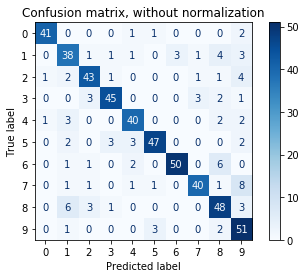

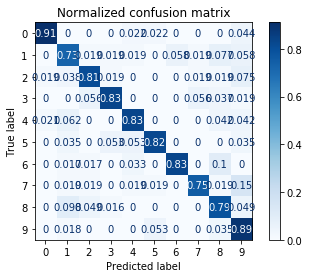

0

In [56]:
# Predict results using the test set
clf_alpha_based.fit(X_train, y_train)
tree_pred = clf_alpha_based.predict(X_test)

# Plot ROC curve
plot_roc_curve(clf_alpha_based, X_test, y_test)

# let's see how our model performed
print(classification_report(y_test, tree_pred))

plot_confusion(clf_alpha_based, X_test, y_test, labels)

### Plot Tree

Max depth based tree


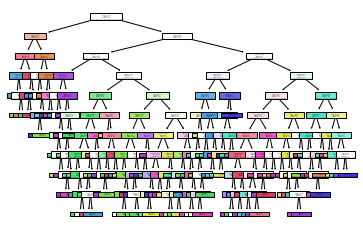

Cost complexity pruning tree


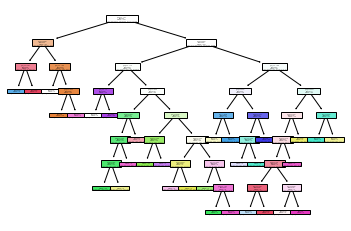

In [57]:
# Plot decision tree visual
print("Max depth based tree")
from sklearn.tree import plot_tree
plot_tree(clf_depth_based, filled=True)
plt.show()

print("Cost complexity pruning tree")
plot_tree(clf_alpha_based, filled=True)
plt.show()

## Boosting

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


### Perform Grid Search

In [63]:
# set hyperparameter space
parameters = {'n_estimators': np.arange(1,50,1)}

# Use a decision tree of max_depth=1 as the weak learner
clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0)), 
                   parameters, 
                   cv=10, 
                   scoring='accuracy',
                   n_jobs=-1)

t0 = time.time()
clf.fit(X_train, y_train)
tree_time = time.time() - t0
print("Boosting model fitted in %.3f s" % tree_time)

print('Best Scores: %.3f using %r' % (clf.best_score_, clf.best_params_))

# save off the best depth
best_n_estimators = clf.best_params_['n_estimators']

Boosting model fitted in 7.202 s
Best Scores: 0.596 using {'n_estimators': 47}


### Validation Curve

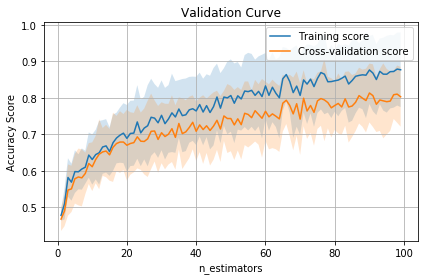

Best parameter values: 
[90]


In [85]:
# Plot validation curve 
# create validation curve varying max depth
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=0))
param_name = "n_estimators"
param_range = np.arange(1,100,1)
plot_validation_curve(clf, X_train, y_train, param_name, param_range)

### Learning and Scalability

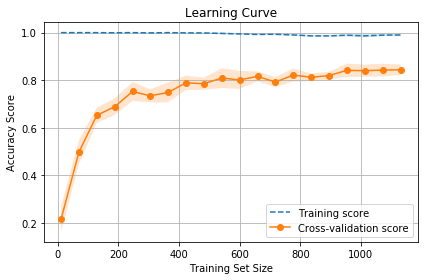

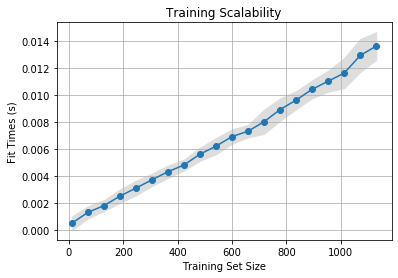

In [86]:
# Plot learning curve for the digits data
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=0), n_estimators=47)
plot_learning_curve(clf_depth_based, X_train, y_train)

### Model Accuracy

Cannot plot ROC curve for anything other than binary classification
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.68      0.58      0.62        52
           2       0.87      0.75      0.81        53
           3       0.92      0.61      0.73        54
           4       0.69      0.79      0.74        48
           5       0.80      0.77      0.79        57
           6       0.86      0.93      0.90        60
           7       0.94      0.30      0.46        53
           8       0.44      0.77      0.56        61
           9       0.71      0.84      0.77        57

    accuracy                           0.73       540
   macro avg       0.78      0.73      0.73       540
weighted avg       0.78      0.73      0.73       540



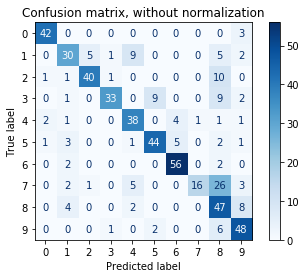

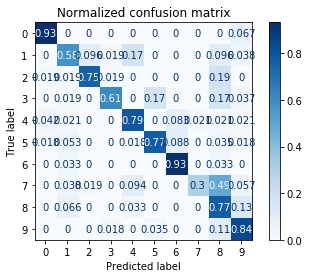

0

In [87]:
# Predict results using the test set
clf.fit(X_train, y_train)
boost_pred = clf.predict(X_test)

# Plot ROC curve
plot_roc_curve(clf, X_test, y_test)

# let's see how our model performed
print(classification_report(y_test, boost_pred))

plot_confusion(clf, X_test, y_test, labels)

## k-Nearest Neighbor

In [93]:
from sklearn.neighbors import KNeighborsClassifier


### Perform Grid Search

In [94]:
# set hyperparameter space
parameters = {'n_neighbors': np.arange(1,50,1)}

# Use a decision tree of max_depth=1 as the weak learner
clf = GridSearchCV(KNeighborsClassifier(), 
                   parameters, 
                   cv=10, 
                   scoring='accuracy',
                   n_jobs=-1)

t0 = time.time()
clf.fit(X_train, y_train)
knn_time = time.time() - t0
print("KNN model fitted in %.3f s" % knn_time)

print('Best Scores: %.3f using %r' % (clf.best_score_, clf.best_params_))

# save off the best depth
best_n_estimators = clf.best_params_['n_neighbors']

KNN model fitted in 2.820 s
Best Scores: 0.972 using {'n_neighbors': 3}


### Validation Curve

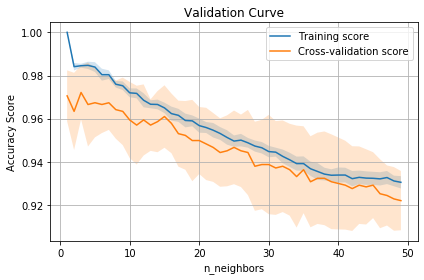

Best parameter values: 
[3]


In [95]:
# Plot validation curve 
# create validation curve varying how many neighbors
clf = KNeighborsClassifier()
param_name = "n_neighbors"
param_range = np.arange(1,50,1)
plot_validation_curve(clf, X_train, y_train, param_name, param_range)

### Learning and Scalability

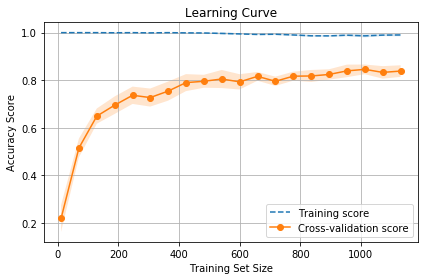

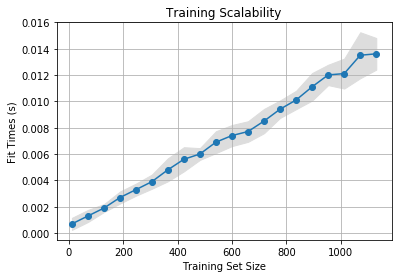

In [96]:
# Plot learning curve for the digits data
clf = KNeighborsClassifier(n_neighbors=best_n_estimators)
plot_learning_curve(clf_depth_based, X_train, y_train)

### Model Accuracy

Cannot plot ROC curve for anything other than binary classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        52
           2       0.95      0.98      0.96        53
           3       0.95      0.98      0.96        54
           4       0.98      0.96      0.97        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.95      0.98      0.96        53
           8       1.00      0.93      0.97        61
           9       0.98      0.95      0.96        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



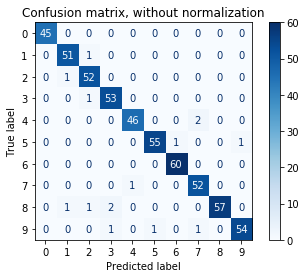

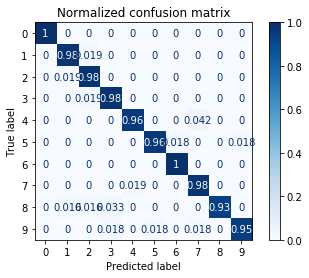

0

In [98]:
# Predict results using the test set
clf.fit(X_train, y_train)
knn_pred = clf.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# Plot ROC curve
plot_roc_curve(clf, X_test, y_test)

# let's see how our model performed
print(classification_report(y_test, knn_pred))

plot_confusion(clf, X_test, y_test, labels)

## Support Vector Machines

In [44]:
from sklearn.svm import SVC


### Perform Grid Search

In [88]:
# setup parameter space
Cvals = np.logspace(0, 3, 6)
Gvals = np.logspace(-4, 0, 5)
kernels = ['linear', 'rbf']

parameters = {'C': Cvals, 'gamma': Gvals, 'kernel': kernels}
#print(parameters)

clf = GridSearchCV(SVC(random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time.time()
clf.fit(X_train, y_train)
svm_time = time.time() - t0

print("SVM model fitted in %.3f s" % svm_time)

print('Best Scores: %.3f using %r' % (clf.best_score_, clf.best_params_))

# save off the best hyperparameters
best_C      = clf.best_params_['C']
best_gamma  = clf.best_params_['gamma']
best_kernel = clf.best_params_['kernel']

SVM model fitted in 5.350 s
Best Scores: 0.982 using {'C': 15.848931924611133, 'gamma': 0.01, 'kernel': 'rbf'}


### Validation Curve

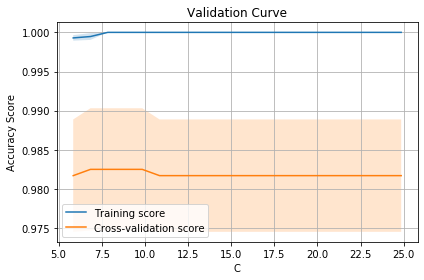

Best parameter values: 
[6.85 7.85 8.85 9.85]


In [89]:
# Plot validation curve for C
clf = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)
param_name = "C"
param_range = np.arange(best_C-10,best_C+10,1)
plot_validation_curve(clf, X_train, y_train, param_name, param_range)

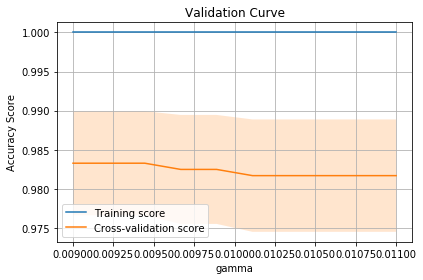

Best parameter values: 
[0.01 0.01 0.01]


In [90]:
# Plot validation curve for gamma
clf = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)
param_name = "gamma"
param_range = np.linspace(0.9*best_gamma,1.1*best_gamma,10)
plot_validation_curve(clf, X_train, y_train, param_name, param_range)

### Learning & Scalability

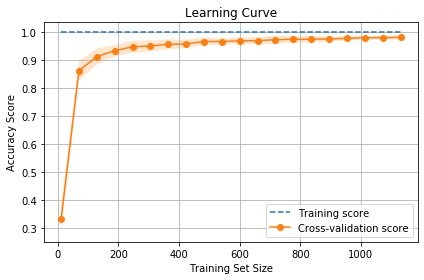

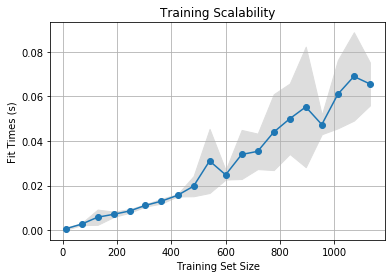

In [91]:
# Plot learning curve for the digits data
clf = SVC(C=8, gamma=best_gamma, kernel=best_kernel)
plot_learning_curve(clf, X_train, y_train)

### Model Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.98      0.98        52
           2       0.98      1.00      0.99        53
           3       1.00      0.98      0.99        54
           4       0.96      1.00      0.98        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      0.97      0.98        61
           9       0.98      0.96      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



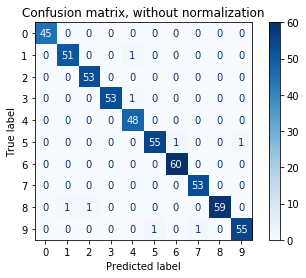

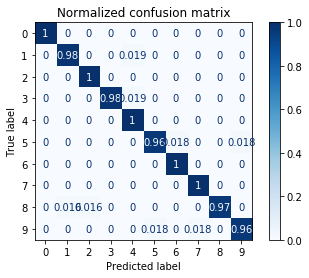

0

In [92]:
# Predict results using the test set
clf.fit(X_train, y_train)
knn_pred = clf.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# Plot ROC curve
#plot_roc_curve(clf, X_test, y_test)

# let's see how our model performed
print(classification_report(y_test, knn_pred))

plot_confusion(clf, X_test, y_test, labels)

## Neural Networks

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

### Perform Grid Search

In [51]:
# setup parameter space
learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(20,10), (40, 20), (10,10), (10, 5)]


parameters = {'solver': solvers, 'learning_rate': learning_rates}
#print(parameters)

clf = GridSearchCV(MLPClassifier(max_iter=2000, activation='relu', alpha=1, random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time.time()
clf.fit(X_train, y_train)
nn_time = time.time() - t0

print("Neural Net model fit in %.3f s" % nn_time)

print('Best Scores: %.3f using %r' % (clf.best_score_, clf.best_params_))

# save off the best hyperparameters
best_solver        = clf.best_params_['solver']
best_learning_rate = clf.best_params_['learning_rate']


Neural Net model fit in 32.941 s
Best Scores: 0.977 using {'learning_rate': 'constant', 'solver': 'lbfgs'}


### Validation Curve

### Learning & Scalability

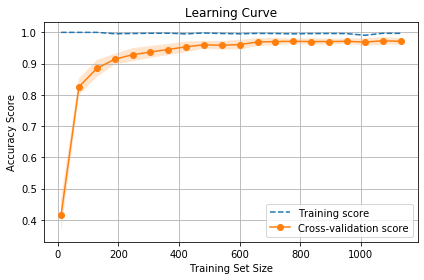

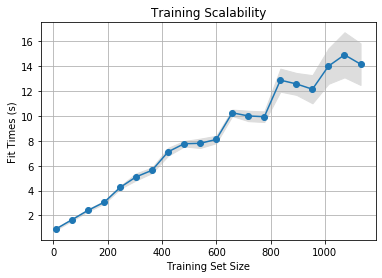

In [61]:
# Plot learning curve for the digits data
clf = MLPClassifier(learning_rate='constant', solver='sgd', activation='relu', alpha=1, max_iter=1000, random_state=0)
plot_learning_curve(clf, X_train, y_train)

### Model Accuracy

Cannot plot ROC curve for anything other than binary classification
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.94      0.98      0.96        52
           2       0.98      0.98      0.98        53
           3       1.00      0.96      0.98        54
           4       0.96      0.96      0.96        48
           5       0.96      0.96      0.96        57
           6       0.97      0.98      0.98        60
           7       0.94      0.96      0.95        53
           8       0.97      0.97      0.97        61
           9       0.98      0.96      0.97        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



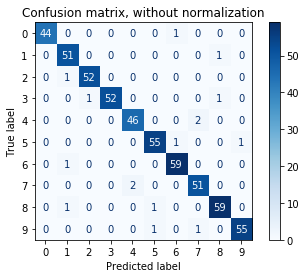

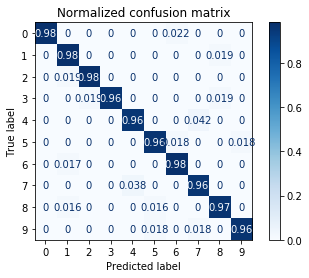

0

In [59]:
# Predict results using the test set
clf.fit(X_train, y_train)
nn_pred = clf.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# Plot ROC curve
plot_roc_curve(clf, X_test, y_test)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

plot_confusion(clf, X_test, y_test, labels)